# Part of Lab-Sheet 9 (COM3502-4502-6502 Speech Processing)

## Correlation of Signals

<br>
<a id='Info'></a>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**General Information**
    
<ul>
<li> 
    This Notebooks repeats knowledge from <a href="./../Lab-Sheet-3.ipynb">Lab-Sheet 3</a> (see <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-3-Solution.ipynb">here for  Solution of Lab-Sheet 3</a> in Google Colab). It is the basis for the <a href="./autocorrelation.ipynb">Autocorrelation Notebook</a>.
</li>     
</ul>
</div>

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/LPC/correlation.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

## Navigation

![Correlation is needed for Autocorrelation](images/flow_correlation.svg)

This Lab Sheet contains several Notebooks (the blue-ish colour in the picture above indicates **this** Notebook to help with navigation):

* The Notebooks [`correlation.ipynb`](./correlation.ipynb),  [`autocorrelation.ipynb`](./autocorrelation.ipynb) and [`fundamental_frequency.ipynb`](./fundamental_frequency.ipynb)  repeat knowlege already known from lab sheet [Lab-Sheet 3](Lab-Sheet-3.ipynb) and [Lab-Sheet 7](Lab-Sheet-7.ipynb), respectively.
* The Notebook [`lpc_analysis.ipynb`](./lpc_analysis.ipynb) provides some information how to analyse speech signals based on Linear Predictive Coding, i.e. how to calculate the Linear Prediction coefficients $a_i$.
* The Notebook [`lpc_synthesis.ipynb`](./lpc_synthesis.ipynb) provides some details on the speech re-synthesis.
* The Notebook [`lpc.ipynb`](./lpc.ipynb) contains the high level functionality.

## Intended Learning Outcomes (ILOs) of this Notebook

After completing this notebook, students should be able to

- *understand* and *illustrate* high positive/negative correlation with example signals,
- *predict* the correlation of two signals and *compare* it with the calculated correlation, and
- *implement* a correlation function to correlate two signals.

## Theory

Correlation describes a statistical relationship between data, in our case between speech signals which are viewed as (realisations of) processes. This means that correlation is a measurement of similarity:
Two signals which are highly correlated (i.e., they have a strong statistical relationship) are similar to each other.

The correlation between two signals $x[k]$ and $y[k]$ is defined as <sup>[[MW1]](https://mathworld.wolfram.com/StatisticalCorrelation.html)</sup>
$$
r_{xy} = \frac{c_{xy}}{\sigma_x \sigma_y}
$$
where $\sigma_x$ and $\sigma_y$ are the standard deviations of the signals and $c_{xy}$ is the covariance between the two signals which can be estimated from the signals by <sup>[[MW2]](https://mathworld.wolfram.com/Covariance.html)</sup>
$$
\hat{c}_{xy} = \frac{1}{L}\sum_{k=1}^L (x[k]-\bar{x})(y[k]-\bar{y}
)$$
with the respective mean values
$$\bar{x} = \frac{1}{L}\sum_{i=1}^L x[i],$$
$$\bar{y} = \frac{1}{L}\sum_{i=1}^L y[i].$$
With estimates for the variances $\hat{\sigma}^2_x$ and $\hat{\sigma}^2_y$
$$\hat{\sigma}_x^2 = \frac{1}{L}\sum_{i=1}^L (x[i]-\bar{x})$$
$$\hat{\sigma}_y^2 = \frac{1}{L}\sum_{i=1}^L (y[i]-\bar{y})$$

we obtain
$$\hat{r}_{xy} = \frac{\sum_{k=1}^L (x[k]-\bar{x})(y[k]-\bar{y})}{L \cdot \hat{\sigma}_x \hat{\sigma}_y}$$.

If the means and standard deviations of the signals are $\bar{x}=\bar{y}=0$ and $\hat{\sigma}_x=\hat{\sigma}_y=1$, respectively, this simplifies to
$$\hat{r}_{xy} = \frac{1}{L}\sum_{k=1}^{L}x[k]y[k].$$

## Implementation

In [6]:
# We need the usual imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
#import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

**Task: (already solved below)** Implement the following function `correlation` which takes two signals and should return the correlation value, assuming both signals have mean $0$ and standard deviation $1$.

**Task: (already solved below)** Implement a second function `normalize_and_correlate` which ensures that the signals have mean $0$ and standard deviation $1$ by subtracting the former and dividing by the latter. Then call your `correlation` function and return its value.

In [4]:
def correlation(signal1, signal2):
    """Return the correlation value of two signals which are assumed to be normalized (mean 0, std 1)."""
    return np.mean(signal1 * signal2)

In [5]:
def normalize_and_correlate(signal1, signal2):
    """Return the correlation value of two signals after normalizing them."""
    return correlation(
        ((signal1 - np.mean(signal1)) / np.std(signal1)),
        ((signal2 - np.mean(signal2)) / np.std(signal2)),
    )

## Plotting

The following function plots two signals, their element-wise multiplication and the resulting correlation value.

In [7]:
def plot_correlation(signal1, signal2, title=""):
    # Ensure that both signals have the same number of samples
    assert len(signal1) == len(signal2)
    
    # Ensure that the signals have both mean 0 and standard deviation 1
    signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    multiplied_signals = signal1 * signal2
    correlation_value = correlation(signal1, signal2)

    y_max = max(np.max(np.abs(signal1)), np.max(np.abs(signal2)), np.max(np.abs(multiplied_signals)))
    
    #fig, axs = plt.subplots(3, figsize=(12, 6))
    fig = plt.figure(figsize=(12, 6), constrained_layout=True)
    fig.suptitle(title)

    # Create grid for the different plots
    gs = fig.add_gridspec(3, 10)

    axs = [fig.add_subplot(gs[0, :-1]), fig.add_subplot(gs[1, :-1]), fig.add_subplot(gs[2, :-1]), fig.add_subplot(gs[:,-1])]
    
    axs[0].plot(np.arange(len(signal1)), signal1, marker="o", lw=0.1)
    axs[1].plot(np.arange(len(signal2)), signal2, marker="o", lw=0.1)
    axs[2].plot(np.arange(len(multiplied_signals)), multiplied_signals, marker="o", lw=0.1)
    #axs[2].plot([0, len(multiplied_signals)-1], [correlation_value, correlation_value], label="correlation: {:.2f}".format(multiplied_mean))
    axs[3].axhline(0, color="black", lw=0.5)
    axs[3].axhline(correlation_value, lw=3)

    axs[0].set_ylim(-y_max*1.1, y_max*1.1)
    axs[1].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-y_max*1.1, y_max*1.1)
    axs[2].set_ylim(-np.max(np.abs(multiplied_signals)) * 1.1, np.max(np.abs(multiplied_signals)) * 1.1)
    axs[3].set_ylim(-1.01, 1.01)
    axs[3].set_xticks([])
    axs[0].get_xaxis().set_ticks([])
    axs[0].set_ylabel("$x[t]$")
    axs[1].set_ylabel("$y[t]$")
    axs[2].set_ylabel("$x[t]\cdot y[t]$")
    axs[1].get_xaxis().set_ticks([])
    axs[2].set_xlabel("time in samples")
    axs[0].title.set_text("The first signal $x[t]$")
    axs[1].title.set_text("The second signal $y[t]$")
    axs[2].title.set_text("Element-wise multiplication of both signals")
    axs[3].title.set_text("Correlation: {:.2f}".format(correlation_value))


## Examples

We can check the correlation of different signals:
1. Correlation of a (sine) signal with itself.
2. Correlation of a sine wave with a sine wave shifted by $\pi$.
3. Correlation of two white noise signals.

### Correlation of a (sine) signal with itself

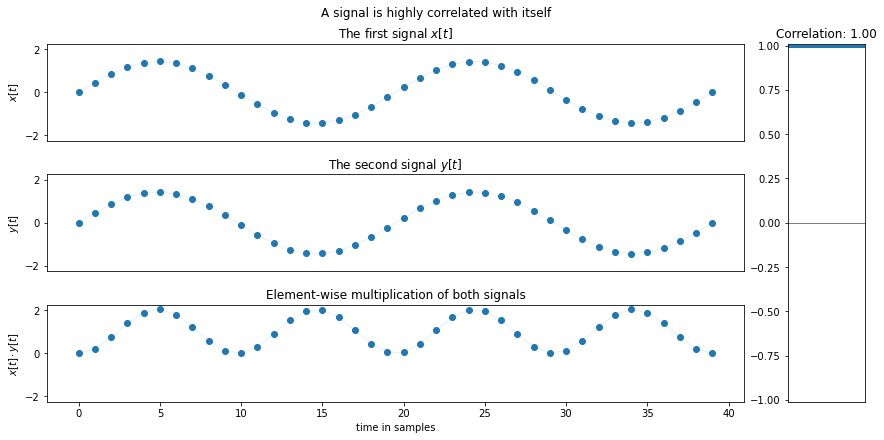

In [8]:
if __name__ == "__main__": # only execute if it is called directly from NB (and not imported)
    signal1 = np.sin(np.linspace(0, 4*np.pi, 40))
    plot_correlation(signal1, signal1, "A signal is highly correlated with itself")

Here we see that the two signals are the same (we passed the same signal twice) and hence all element-wise products are positive. As a result the correlation value (which is displayed in the right panel as a blue bar) is high and positive.

### Correlation of a sine wave with a sine wave shifted by $\pi$

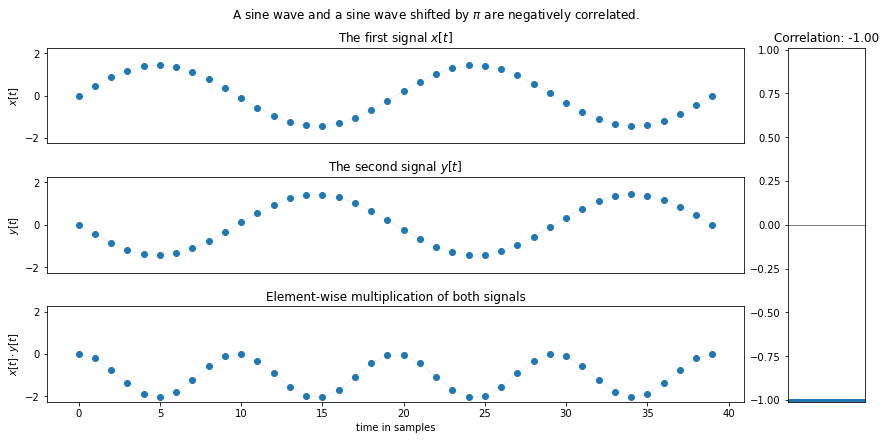

In [7]:
if __name__ == "__main__": # only execute if it is called directly from NB (and not imported)
    signal2 = np.sin(np.linspace(np.pi, 5*np.pi, 40))
    plot_correlation(signal1, signal2, "A sine wave and a sine wave shifted by $\pi$ are negatively correlated.")

Here we see that the two signals are mirrored along the horizontal axis and hence all element-wise products are negative. As a result the correlation value is high but negative. Therefore it is also sometimes common to report the absolute value of the correlation.

### Correlation of two white noise signals

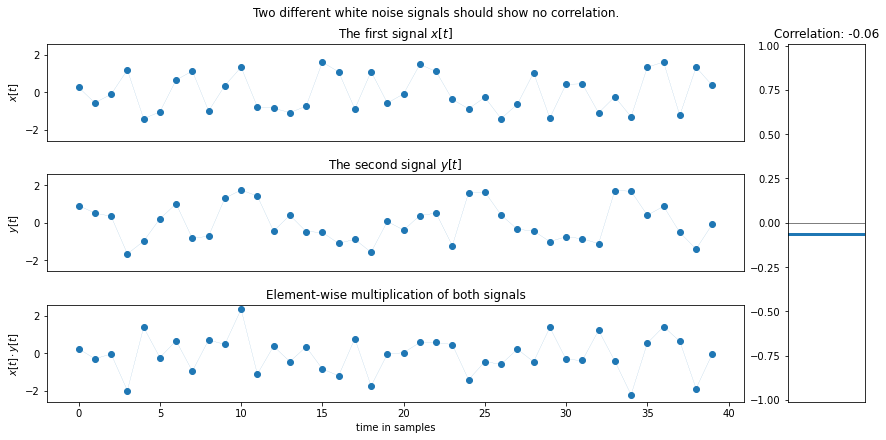

In [8]:
if __name__ == "__main__": # only execute if it is called directly from NB (and not imported)
    np.random.seed(100)
    noise1 = np.random.uniform(-1, 1, size=40)
    noise2 = np.random.uniform(-1, 1, size=40)
    plot_correlation(noise1, noise2, "Two different white noise signals should show no correlation.")

As we can see in the previous (fixed) example, two noise signal do not have a high correlation. This results from their random nature.

*Note:* Since we always have to deal with variances of the signals, the measured correlation is seldom exactly $0$.

## Copyright
This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 
### Contributors
[Stefan Goetze](http://www.stefan-goetze.de "Web page of Stefan Goetze"),
[Lena Strobl](https://github.com/sleyna/)